Scipy:

In [21]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
                

In [3]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [17]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [18]:
def plot_fig(Max,Min):
  months = np.arange(12)
  days = np.linspace(0, 12, num=365)
  res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      Max, [20, 10, 0])
  res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      Min, [-40, 20, 0])
  
  plt.figure()
  plt.plot(months, Max, 'ro')
  plt.plot(days, yearly_temps(days, *res_max), 'r-')
  plt.plot(months, Min, 'bo')
  plt.plot(days, yearly_temps(days, *res_min), 'b-')
  plt.xlabel('Month')
  plt.ylabel('Temperature ($^\circ$C)')
  plt.show()


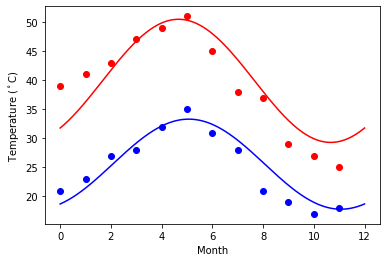

In [19]:
plot_fig(Max , Min)

Matplotlib:

In [22]:
titanic = pd.read_csv("/content/drive/MyDrive/titanic.csv")

In [23]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
sex = titanic.sex.value_counts()

Text(0.5, 1.0, 'Male/Female Proprtion ')

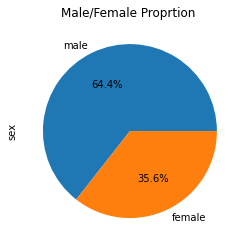

In [36]:
ax = sex.plot(kind='pie',autopct='%1.1f%%')
ax.set_title("Male/Female Proprtion ")

In [39]:
new_df = titanic[['fare','age','sex']]

In [41]:
new_df.head()

,fare,age,sex
0,211.3375,29.0000,female
1,151.5500,0.9167,male
2,151.5500,2.0000,female
3,151.5500,30.0000,male
4,151.5500,25.0000,female


In [52]:
new_df.age.max(),new_df.age.min()

(80.0, 0.1667)

In [42]:
groups = new_df.groupby("sex")


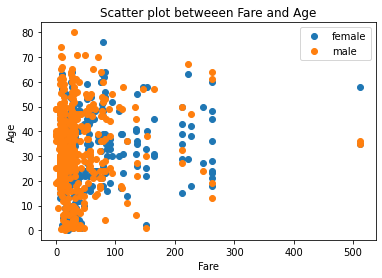

In [50]:
for name, group in groups:
    plt.plot(group["fare"], group["age"], marker="o", linestyle="", label=name)
plt.xlabel("Fare")
plt.ylabel("Age")
plt.title("Scatter plot betweeen Fare and Age")
plt.legend()
